In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
p = 30
v_max = 20
f = np.array([1, 2, 3, 2, 1,0])
# f = np.array([ 274, 197, 156, 154, 181, 218, 245, 243, 203, 126 ])

solve for `[left_leaf_times, right_leaf_times]` (variables)

In [3]:
x_size = f.shape[0]
nb_var = 2*x_size

# cost function
c = np.ones(nb_var)

# equality constraints
A_eq = np.zeros((x_size, nb_var))
for i in range(f.shape[0]):
    A_eq[i, i] = 1
    A_eq[i, i+f.shape[0]] = -1
b_eq = f/p

# inequality constraints
A_ub = np.zeros((4*(x_size-1), nb_var))
for i in range(x_size-1):
    A_ub[0*(x_size-1)+i, i] = 1
    A_ub[0*(x_size-1)+i, i+1] = -1
    A_ub[1*(x_size-1)+i, i] = -1
    A_ub[1*(x_size-1)+i, i+1] = 1
    A_ub[2*(x_size-1)+i, x_size+i] = 1
    A_ub[2*(x_size-1)+i, x_size+i+1] = -1
    A_ub[3*(x_size-1)+i, x_size+i] = -1
    A_ub[3*(x_size-1)+i, x_size+i+1] = 1
b_ub = np.ones(A_ub.shape[0])*v_max
b_ub[1*(x_size-1):2*(x_size-1)] = 0
b_ub[3*(x_size-1):4*(x_size-1)] = 0

# bounds
bounds = [(0, None)]*nb_var

In [4]:
res = scipy.optimize.linprog(c, A_ub, b_ub, A_eq, b_eq, bounds, method='highs')

In [5]:
res

           con: array([0., 0., 0., 0., 0., 0.])
 crossover_nit: 0
         eqlin:  marginals: array([-1., -1.,  5.,  1.,  1.,  1.])
  residual: array([0., 0., 0., 0., 0., 0.])
           fun: 0.5
       ineqlin:  marginals: array([ -0.,  -0.,  -0.,  -0.,  -0.,  -2.,  -4.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -6.,  -8., -10.])
  residual: array([20.        , 20.        , 19.96666667, 19.96666667, 19.96666667,
        0.        ,  0.        ,  0.03333333,  0.03333333,  0.03333333,
       19.96666667, 19.96666667, 20.        , 20.        , 20.        ,
        0.03333333,  0.03333333,  0.        ,  0.        ,  0.        ])
         lower:  marginals: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.])
  residual: array([ 0.1       ,  0.1       ,  0.1       ,  0.06666667,  0.03333333,
       -0.        ,  0.06666667,  0.03333333, -0.        , -0.        ,
       -0.        ,  0.        ])
       message: 'Optimization terminated successfully.

In [6]:
# split the solution
left_leaf_times = res.x[:x_size]
right_leaf_times = res.x[x_size:]
# compute actual fluence
g = (left_leaf_times - right_leaf_times)*p

print('left leaf times: ', left_leaf_times)
print('right leaf times: ', right_leaf_times)

left leaf times:  [ 0.1         0.1         0.1         0.06666667  0.03333333 -0.        ]
right leaf times:  [ 0.06666667  0.03333333 -0.         -0.         -0.          0.        ]


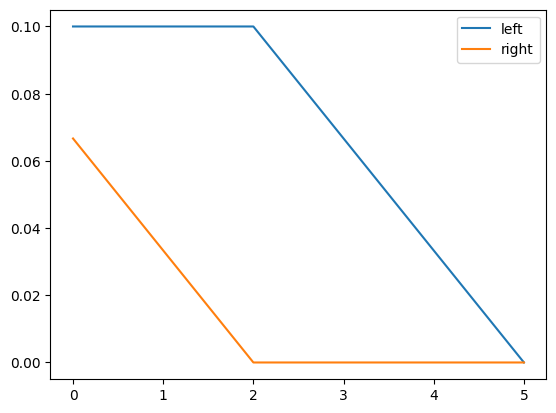

In [7]:
# plt.plot(f, label='f')
# plt.plot(g, label='g')
plt.plot(left_leaf_times, label='left')
plt.plot(right_leaf_times, label='right')
plt.legend()
plt.show()